# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

I work for a Machine Learning start up in the recruitment sector. One of the products we want to offer is an accurate salary predictor based on the information candidates provide us. This gives candidates power when going into salary negotiation as they know if the company is offering a fair salary or not. 

The product is in its early stages and they want to build a prototype. 

In this project I will build a prototype to predict the salaries for a range of jobs given a number of features. 

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#your info here
__author__ = "Adam Murphy"
__email__ = "adamdmurphy4@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [16]:
#load the data into a Pandas dataframe
features = pd.read_csv('data/train_features.csv')
salaries = pd.read_csv('data/train_salaries.csv')

In [21]:
features.info(), salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


(None, None)

In [31]:
features_and_salaries = features.merge(salaries, how='outer', on='jobId')
features_and_salaries.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### ---- 3 Clean the data ----

In [38]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

# Check that all jobId are unique, no repeats
len(features_and_salaries) == len(features_and_salaries.jobId.unique())

True

In [67]:
# Check unique values in all the other columns and make sure they all make sense
for c in features_and_salaries:
    if c != 'jobId':
        print(c)
        unique_elements = features_and_salaries[c].unique()
        unique_elements.sort()
        print(unique_elements)

companyId
['COMP0' 'COMP1' 'COMP10' 'COMP11' 'COMP12' 'COMP13' 'COMP14' 'COMP15'
 'COMP16' 'COMP17' 'COMP18' 'COMP19' 'COMP2' 'COMP20' 'COMP21' 'COMP22'
 'COMP23' 'COMP24' 'COMP25' 'COMP26' 'COMP27' 'COMP28' 'COMP29' 'COMP3'
 'COMP30' 'COMP31' 'COMP32' 'COMP33' 'COMP34' 'COMP35' 'COMP36' 'COMP37'
 'COMP38' 'COMP39' 'COMP4' 'COMP40' 'COMP41' 'COMP42' 'COMP43' 'COMP44'
 'COMP45' 'COMP46' 'COMP47' 'COMP48' 'COMP49' 'COMP5' 'COMP50' 'COMP51'
 'COMP52' 'COMP53' 'COMP54' 'COMP55' 'COMP56' 'COMP57' 'COMP58' 'COMP59'
 'COMP6' 'COMP60' 'COMP61' 'COMP62' 'COMP7' 'COMP8' 'COMP9']
jobType
['CEO' 'CFO' 'CTO' 'JANITOR' 'JUNIOR' 'MANAGER' 'SENIOR' 'VICE_PRESIDENT']
degree
['BACHELORS' 'DOCTORAL' 'HIGH_SCHOOL' 'MASTERS' 'NONE']
major
['BIOLOGY' 'BUSINESS' 'CHEMISTRY' 'COMPSCI' 'ENGINEERING' 'LITERATURE'
 'MATH' 'NONE' 'PHYSICS']
industry
['AUTO' 'EDUCATION' 'FINANCE' 'HEALTH' 'OIL' 'SERVICE' 'WEB']
yearsExperience
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
milesFromM

In [72]:
# Look at jobs with salary == 0
no_salary = features_and_salaries[features_and_salaries['salary'] == 0]
no_salary.index

Int64Index([30559, 495984, 652076, 816129, 828156], dtype='int64')

In [75]:
# Only 5 with salary == 0, so let's drop them
features_and_salaries.drop(no_salary.index, inplace=True)

In [77]:
# Check for duplicates in all
dups = features_and_salaries[features_and_salaries.duplicated()]
len(dups)

0

In [79]:
# Check for duplicates just in features
dup_features = features[features.duplicated()]
len(dup_features)

0

Seems like after the basic checks of duplicates, removed jobs with 0 salary since all jobs must pay some salary and checked nothing was lost on the merge.

Still may be issues such as a janitor job being paid 100k+ or a super senior job being paid a tiny amount. We'll find out the answers through EDA

### ---- 4 Explore the data (EDA) ----

In [120]:
for c in features_and_salaries.columns[2:-1]:
    

Index(['jobType', 'degree', 'major', 'industry', 'yearsExperience',
       'milesFromMetropolis'],
      dtype='object')

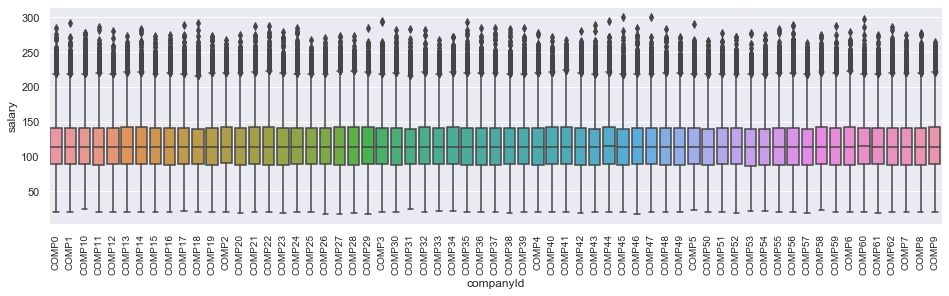

In [104]:
#summarize each feature variable
fig, ax = plt.subplots(figsize=plt.figaspect(1/4))
sns.boxplot(x='companyId', y='salary', data=features_and_salaries.sort_values(by='companyId'))
plt.xticks(rotation=90, size=10)
plt.show()

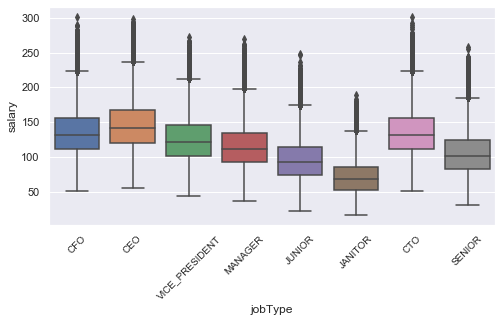

In [107]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/2))
sns.boxplot(x='jobType', y='salary', data=features_and_salaries)
plt.xticks(rotation=45, size=10)
plt.show()

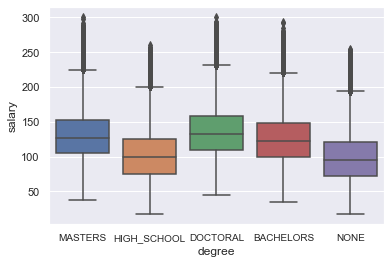

In [113]:
fig, ax = plt.subplots()
sns.boxplot(x='degree', y='salary', data=features_and_salaries)
plt.xticks(size=10)
plt.show()

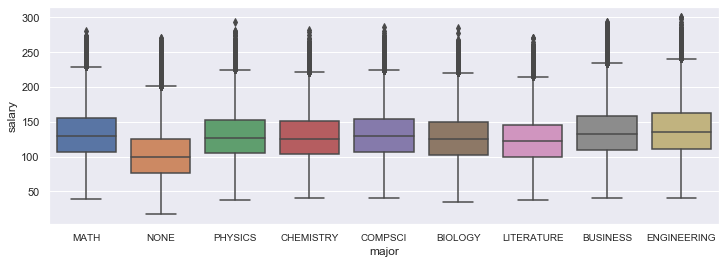

In [117]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/3))
sns.boxplot(x='major', y='salary', data=features_and_salaries)
plt.xticks(size=10)
plt.show()

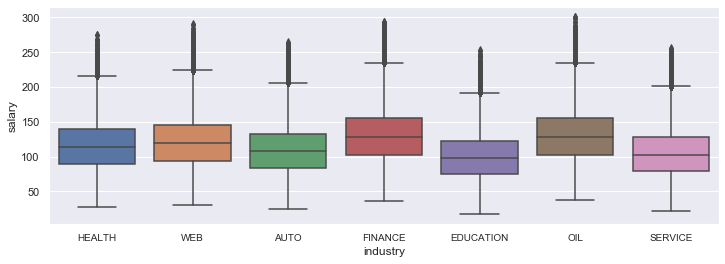

In [123]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/3))
sns.boxplot(x='industry', y='salary', data=features_and_salaries)
plt.xticks(size=10)
plt.show()

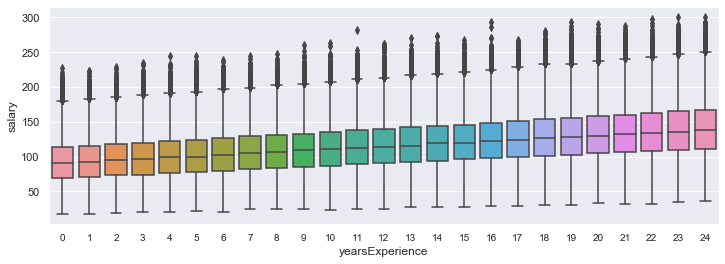

In [124]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/3))
sns.boxplot(x='yearsExperience', y='salary', data=features_and_salaries)
plt.xticks(size=10)
plt.show()

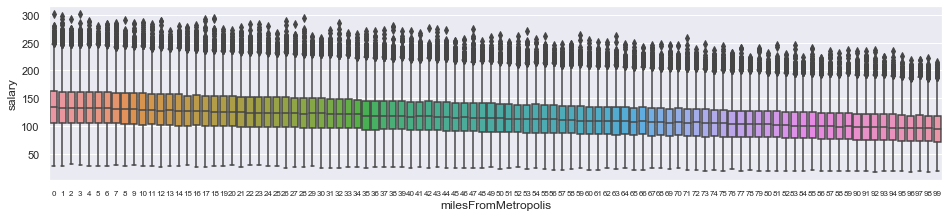

In [127]:
fig, ax = plt.subplots(figsize=plt.figaspect(1/5))
sns.boxplot(x='milesFromMetropolis', y='salary', data=features_and_salaries)
plt.xticks(size=8)
plt.show()

Notes:
1. Some Junior and Janitor jobs have SUPER high pay which is unusual. Want to check those outliers. 

In [93]:
salaries.describe()

,salary
count,1000000.000000
mean,116.061818
std,38.717936
min,0.000000
25%,88.000000
50%,114.000000
75%,141.000000
max,301.000000


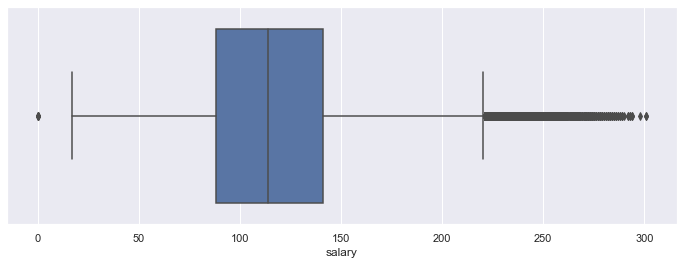

In [90]:
#summarize the target variable
fig, ax = plt.subplots(figsize=plt.figaspect(1/3))
sns.boxplot(x=salaries.salary)
plt.show()

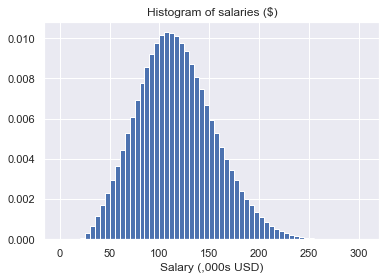

In [94]:
bins = np.arange(0, 310, 5)

fig, ax = plt.subplots()
ax.hist(salaries.salary, density=True, bins=bins)
ax.set(xlabel='Salary (,000s USD)', title='Histogram of salaries ($)')
plt.show()

In [3]:
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data